In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import neccessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module_2/energydata_complete.csv")

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# There is no null valves in the dataset
data.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
# select a sample of the dataset
# From the dataset, fit a linear model on the relationship between the temperature in the living room in 
# Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?
sample_data = data[["T6", "T2"]].sample(20, random_state=2)

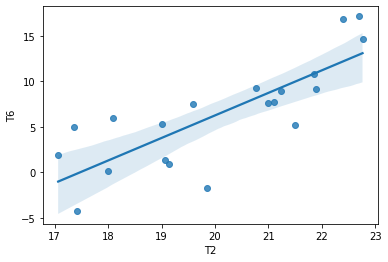

In [10]:
sns.regplot(x="T2", y="T6", data=sample_data)

## Measuring Regression Performance

In [14]:
# Normalizing the dataset to a common scale using the min max scaler
# The date column will not be much useful in this model so we can do without it
#data =data.drop(["date","lights"], axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [16]:
features_df = normalised.drop(columns=["Appliances"])
target_feature = normalised["Appliances"]

In [17]:
features_df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [18]:
target_feature

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [20]:
# splitting the dataset into training and testing dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Use a 70-30 train-test set split with a random state of 42 (for reproducibility)
x_train, x_test, y_train, y_test = train_test_split(features_df, target_feature, test_size=0.3, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13814, 26), (13814,), (5921, 26), (5921,))

In [25]:
linear_model = LinearRegression()
# fir the model to the training datset
linear_model.fit(x_train, y_train)

# obtain prediction
prediction_values = linear_model.predict(x_test)
prediction_values

# Error margin
from sklearn.metrics import mean_absolute_error
mae =mean_absolute_error(y_test, prediction_values)
round(mae, 2)

0.05

In [26]:
# Residual sum of Squares(RSS)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, prediction_values))
round(rmse, 2)

0.09

In [27]:
# R-squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, prediction_values)
round(r2_score, 3)

0.149

In [31]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [32]:
# Feature Selection, The LASSO Regression and Elastic Net
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    # This function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns =["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weights_df = get_weights_df(lasso_reg, x_train, "Lasso_Weight")

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on="Features")
final_weights =pd.merge(final_weights, lasso_weights_df, on="Features")

In [46]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


# Running the Dataset through more models 

In [36]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 31 kB/s 


In [37]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
# putting models in a dictionary
models = {"XGBoost Regressor": XGBRegressor(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Catboost": CatBoostRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
          "KNeighborRegressor": KNeighborsRegressor(),
          "Ridge": Ridge(),
          "SVR": SVR(),
          "LinearRegression": LinearRegression(),
          }

In [39]:
# setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  fits and evaluates given machine learning models
  models: a dictionary of different scikit learn machine learning models
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: testing labels
  """
  # setting up a random seed
  np.random.seed(42)

  # making a dictionary to keep model scores
  model_scores = {}

  # looping through models
  for name, model in models.items():
    # fitting the model to the data
    model.fit(x_train, y_train)
    # evaluating the model and appending its score to model_scores
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [40]:
%%time
scores = fit_and_score(models=models,
                      X_train=x_train,
                      X_test=x_test,
                      y_train=y_train,
                      y_test=y_test)

scores

[10:03:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.061994
0:	learn: 0.0957200	total: 59.6ms	remaining: 59.6s
1:	learn: 0.0952132	total: 66.4ms	remaining: 33.1s
2:	learn: 0.0949133	total: 72.3ms	remaining: 24s
3:	learn: 0.0944872	total: 78.7ms	remaining: 19.6s
4:	learn: 0.0940935	total: 85.2ms	remaining: 17s
5:	learn: 0.0937535	total: 91.9ms	remaining: 15.2s
6:	learn: 0.0933266	total: 99.4ms	remaining: 14.1s
7:	learn: 0.0929309	total: 109ms	remaining: 13.5s
8:	learn: 0.0925677	total: 121ms	remaining: 13.3s
9:	learn: 0.0922672	total: 127ms	remaining: 12.6s
10:	learn: 0.0920211	total: 134ms	remaining: 12.1s
11:	learn: 0.0916696	total: 141ms	remaining: 11.6s
12:	learn: 0.0914185	total: 148ms	remaining: 11.2s
13:	learn: 0.0911084	total: 154ms	remaining: 10.9s
14:	learn: 0.0908549	total: 161ms	remaining: 10.6s
15:	learn: 0.0905777	total: 167ms	remaining: 10.3s
16:	learn: 0.0903188	total: 174ms	

{'XGBoost Regressor': 0.24345816075871318,
 'DecisionTree Regressor': 0.1614398133221815,
 'Random Forest': 0.563339754567746,
 'Catboost': 0.457554744684026,
 'gradientboosting': 0.24279514949683534,
 'KNeighborRegressor': 0.2717993350510052,
 'Ridge': 0.14753506744547007,
 'SVR': 0.012798585656089712,
 'LinearRegression': 0.14890246319303535}

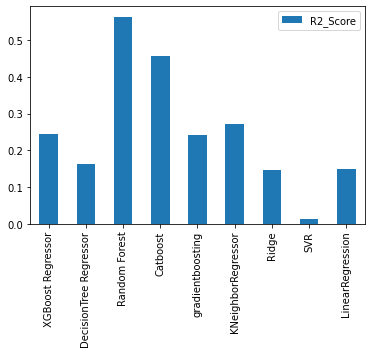

In [41]:
model_compare = pd.DataFrame(scores, index=["R2_Score"])
model_compare.T.plot.bar(); # T means transpose, so as to improve the plot

### The Random Forest Model performs Best